In [ ]:
# our model will treat the data heteroskedatically
# with an individual attack and defence for each team

In [26]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

In [42]:
import numpy as np

In [198]:
import pandas as pd

In [199]:
# to get the URL go to the file on github and press the `raw` button
url = "https://raw.githubusercontent.com/MaggieLieu/STAN_tutorials/6616b30827530521e2d5f9cf3f3e2fccc761c27d/Hierarchical/premiereleague.csv"
names = ["home", "score1", "score2", "away"]
df = pd.read_csv(url, names=names)
df.head()

home  score1  score2                    away
0        Liverpool       4       1            Norwich City
1  West Ham United       0       5         Manchester City
2          Burnley       3       0             Southampton
3   Crystal Palace       0       0                 Everton
4          Watford       0       3  Brighton & Hove Albion

In [200]:
df.columns

Index(['home', 'score1', 'score2', 'away'], dtype='object')

In [201]:
data = df.to_numpy()

In [202]:
data

array([['Liverpool', 4, 1, 'Norwich City'],
       ['West Ham United', 0, 5, 'Manchester City'],
       ['Burnley', 3, 0, 'Southampton'],
       ...,
       ['Newcastle United', 2, 2, 'West Ham United'],
       ['Liverpool', 2, 0, 'Aston Villa'],
       ['Southampton', 1, 0, 'Manchester City']], dtype=object)

In [203]:
data[:,0]

array(['Liverpool', 'West Ham United', 'Burnley', 'Crystal Palace',
       'Watford', 'AFC Bournemouth', 'Tottenham Hotspur',
       'Leicester City', 'Newcastle United', 'Manchester United',
       'Arsenal', 'Aston Villa', 'Everton', 'Norwich City', 'Southampton',
       'Brighton & Hove Albion', 'Manchester City', 'Sheffield United',
       'Chelsea', 'Wolverhampton Wanderers', 'Aston Villa',
       'Norwich City', 'Manchester United', 'Sheffield United',
       'Brighton & Hove Albion', 'Watford', 'Liverpool',
       'AFC Bournemouth', 'Wolverhampton Wanderers', 'Tottenham Hotspur',
       'Southampton', 'Manchester City', 'Newcastle United', 'Chelsea',
       'Leicester City', 'West Ham United', 'Crystal Palace', 'Burnley',
       'Everton', 'Arsenal', 'Liverpool', 'Wolverhampton Wanderers',
       'Tottenham Hotspur', 'Manchester United', 'Sheffield United',
       'Brighton & Hove Albion', 'Norwich City', 'AFC Bournemouth',
       'Watford', 'Aston Villa', 'Southampton', 'Leices

In [204]:
data[:,1]

array([4, 0, 3, 0, 0, 1, 3, 0, 0, 4, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 0, 1, 3, 1, 1, 0, 1, 4, 1, 2, 3, 2, 1, 0, 3, 2, 3, 2, 4, 1,
       0, 1, 3, 3, 2, 0, 1, 2, 8, 0, 2, 0, 2, 1, 3, 1, 0, 2, 2, 2, 2, 2,
       2, 1, 5, 1, 3, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0,
       1, 1, 0, 3, 1, 3, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 3, 2, 1, 0, 1,
       0, 2, 2, 1, 3, 1, 2, 2, 3, 3, 2, 2, 0, 1, 0, 0, 1, 2, 3, 2, 2, 2,
       0, 3, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 5, 0, 1, 3, 5, 0, 0,
       1, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       3, 2, 0, 2, 1, 0, 1, 1, 2, 1, 4, 0, 3, 2, 1, 1, 3, 2, 1, 0, 1, 1,
       2, 1, 1, 0, 1, 2, 2, 1, 4, 2, 2, 1, 1, 1, 3, 1, 4, 1, 0, 0, 1, 0,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 3, 0, 2, 4, 2, 0, 1, 0, 2, 4,
       0, 3, 0, 2, 2, 0, 0, 2, 3, 1, 2, 0, 1, 0, 2, 4, 0, 2, 2, 1, 3, 2,
       1, 0, 3, 3, 3, 3, 1, 0, 0, 3, 2, 3, 2, 1, 2, 0, 1, 1, 0, 1, 1, 4,
       2, 4, 0, 3, 0, 1, 1, 2, 0, 0, 3, 1, 0, 5, 0,

In [205]:
data[:,2]

array([1, 5, 0, 0, 3, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 1, 0, 3,
       2, 2, 2, 3, 1, 3, 1, 1, 1, 0, 1, 2, 1, 0, 0, 3, 2, 2, 1, 5, 0, 0,
       1, 1, 2, 1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 0,
       2, 3, 0, 1, 0, 1, 5, 0, 0, 2, 2, 0, 4, 0, 0, 1, 1, 0, 1, 1, 0, 2,
       1, 0, 9, 0, 1, 2, 0, 4, 1, 1, 2, 3, 0, 0, 2, 1, 1, 0, 3, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 2, 2, 2, 3, 2, 1, 3, 0, 2, 1,
       1, 2, 2, 1, 1, 2, 2, 1, 0, 4, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 0, 3,
       2, 4, 1, 2, 2, 3, 0, 1, 0, 1, 0, 1, 2, 1, 3, 1, 0, 3, 0, 2, 1, 1,
       1, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 4, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 1, 3, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 3, 6, 0,
       2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0,
       0, 3, 1, 3, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 3, 0, 2, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 2, 2, 0, 1, 0, 1, 2, 0, 3, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 3, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0,

Text(0, 0.5, 'score2')

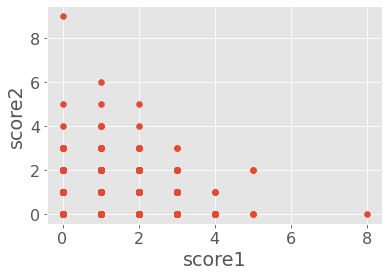

In [206]:
plt.figure()
plt.scatter(data[:,1], data[:,2])
plt.xlabel(names[1])
plt.ylabel(names[2])

# analysis

In [207]:
df["home"].unique()

array(['Liverpool', 'West Ham United', 'Burnley', 'Crystal Palace',
       'Watford', 'AFC Bournemouth', 'Tottenham Hotspur',
       'Leicester City', 'Newcastle United', 'Manchester United',
       'Arsenal', 'Aston Villa', 'Everton', 'Norwich City', 'Southampton',
       'Brighton & Hove Albion', 'Manchester City', 'Sheffield United',
       'Chelsea', 'Wolverhampton Wanderers'], dtype=object)

In [208]:
np.unique(data[:,0])

array(['AFC Bournemouth', 'Arsenal', 'Aston Villa',
       'Brighton & Hove Albion', 'Burnley', 'Chelsea', 'Crystal Palace',
       'Everton', 'Leicester City', 'Liverpool', 'Manchester City',
       'Manchester United', 'Newcastle United', 'Norwich City',
       'Sheffield United', 'Southampton', 'Tottenham Hotspur', 'Watford',
       'West Ham United', 'Wolverhampton Wanderers'], dtype=object)

In [209]:
 set(np.unique(data[:,0])) == set(df["home"].unique())

True

In [214]:
# teams
teams = df["home"].unique()

# number of teams
nt = len(teams)

# number of games
ng = len(df)

print(f"nt: {nt}")
print(f"ng: {ng}")

nt: 20
ng: 329


In [215]:
np.where(data[:,0] == teams[0] )[0]

array([  0,  26,  40,  71,  97, 119, 131, 147, 160, 197, 208, 228, 241,
       269, 278, 306, 327])

In [216]:
np.where(df["home"] == teams[0] )[0]

array([  0,  26,  40,  71,  97, 119, 131, 147, 160, 197, 208, 228, 241,
       269, 278, 306, 327])

In [217]:
# teams = np.array(sorted(teams))

In [218]:
df.head()

home  score1  score2                    away
0        Liverpool       4       1            Norwich City
1  West Ham United       0       5         Manchester City
2          Burnley       3       0             Southampton
3   Crystal Palace       0       0                 Everton
4          Watford       0       3  Brighton & Hove Albion

In [219]:
teams

array(['Liverpool', 'West Ham United', 'Burnley', 'Crystal Palace',
       'Watford', 'AFC Bournemouth', 'Tottenham Hotspur',
       'Leicester City', 'Newcastle United', 'Manchester United',
       'Arsenal', 'Aston Villa', 'Everton', 'Norwich City', 'Southampton',
       'Brighton & Hove Albion', 'Manchester City', 'Sheffield United',
       'Chelsea', 'Wolverhampton Wanderers'], dtype=object)

In [220]:
# convert team names for each match into numbers

# for each team we assign an integer
# this dictionary is a map between the team name and it's number
team_number_dict = {k:i for i, k in enumerate(teams)}


# home team index
# will be an array of length ng (number of games)
# it indexes which team played home in each game
ht = []
for home_team in df["home"]:
    ht.append(team_number_dict[home_team])
ht = np.array(ht)

# same for away team
# it indexes which team played away in each game
at = []
for away_team in df["away"]:
    at.append(team_number_dict[away_team])
at = np.array(at)

In [222]:
team_number_dict

{'Liverpool': 0,
 'West Ham United': 1,
 'Burnley': 2,
 'Crystal Palace': 3,
 'Watford': 4,
 'AFC Bournemouth': 5,
 'Tottenham Hotspur': 6,
 'Leicester City': 7,
 'Newcastle United': 8,
 'Manchester United': 9,
 'Arsenal': 10,
 'Aston Villa': 11,
 'Everton': 12,
 'Norwich City': 13,
 'Southampton': 14,
 'Brighton & Hove Albion': 15,
 'Manchester City': 16,
 'Sheffield United': 17,
 'Chelsea': 18,
 'Wolverhampton Wanderers': 19}

In [227]:
# to get all games where Liverpool was Home you can do this
data[np.where(ht==team_number_dict["Liverpool"])[0]]

array([['Liverpool', 4, 1, 'Norwich City'],
       ['Liverpool', 3, 1, 'Arsenal'],
       ['Liverpool', 3, 1, 'Newcastle United'],
       ['Liverpool', 2, 1, 'Leicester City'],
       ['Liverpool', 2, 1, 'Tottenham Hotspur'],
       ['Liverpool', 3, 1, 'Manchester City'],
       ['Liverpool', 2, 1, 'Brighton & Hove Albion'],
       ['Liverpool', 5, 2, 'Everton'],
       ['Liverpool', 2, 0, 'Watford'],
       ['Liverpool', 1, 0, 'Wolverhampton Wanderers'],
       ['Liverpool', 2, 0, 'Sheffield United'],
       ['Liverpool', 2, 0, 'Manchester United'],
       ['Liverpool', 4, 0, 'Southampton'],
       ['Liverpool', 3, 2, 'West Ham United'],
       ['Liverpool', 2, 1, 'AFC Bournemouth'],
       ['Liverpool', 4, 0, 'Crystal Palace'],
       ['Liverpool', 2, 0, 'Aston Villa']], dtype=object)

In [228]:
# to get all games where Liverpool was Away you can do this
data[np.where(at==team_number_dict["Liverpool"])[0]]

array([['Southampton', 1, 2, 'Liverpool'],
       ['Burnley', 0, 3, 'Liverpool'],
       ['Chelsea', 1, 2, 'Liverpool'],
       ['Sheffield United', 0, 1, 'Liverpool'],
       ['Manchester United', 1, 1, 'Liverpool'],
       ['Aston Villa', 1, 2, 'Liverpool'],
       ['Crystal Palace', 1, 2, 'Liverpool'],
       ['AFC Bournemouth', 0, 3, 'Liverpool'],
       ['Leicester City', 0, 4, 'Liverpool'],
       ['Tottenham Hotspur', 0, 1, 'Liverpool'],
       ['Wolverhampton Wanderers', 1, 2, 'Liverpool'],
       ['West Ham United', 0, 2, 'Liverpool'],
       ['Norwich City', 0, 1, 'Liverpool'],
       ['Watford', 3, 0, 'Liverpool'],
       ['Everton', 0, 0, 'Liverpool'],
       ['Manchester City', 4, 0, 'Liverpool']], dtype=object)

In [56]:
# define model equations

# theta1: is the home team expected score
# theta2: is the away team expected score

# these will be the parameters of the poisson distributions
# for the home and away teams

def theta1(home, attack, defence):
    return np.exp(home + attack - defence)

def theta2(attack, defence):
    return np.exp(attack - defence)

In [238]:
# set up data
# we will reserve the last 5 elements for prediction/testing

np = 5
ngob = ng - np

datadict = {}

# number of predictions
datadict['np'] = np
datadict['ngob'] = ngob
datadict['nt'] = nt
datadict['ng'] = ng
datadict['ht'] = ht[:ngob]
datadict['at'] = at[:ngob]
datadict['s1'] = df["score1"][:ngob]
datadict['s2'] = df["score2"][:ngob]
datadict['htnew'] = ht[ngob:]
datadict['atnew'] = at[ngob:]

In [239]:
len(datadict['ht'])+len(datadict['htnew'])

329

In [240]:
len(datadict['at'])+len(datadict['atnew'])

329

## pymc model

In [241]:
import pymc3 as pm

In [242]:
import theano.tensor as tt

In [243]:
# based on https://docs.pymc.io/notebooks/rugby_analytics.html#Building-of-the-model
with pm.Model() as model:
    
    # global model parameters
    home = pm.Flat("home")
    intercept = pm.Flat("intercept")
    sd_att = pm.HalfStudentT("sd_att", nu=3, sigma=2.5)
    sd_def = pm.HalfStudentT("sd_def", nu=3, sigma=2.5)
    
    # team-specific model parameters
    atts_star = pm.Normal("atts_star", mu=0, sigma=sd_att, shape=datadict["nt"])
    defs_star = pm.Normal("defs_star", mu=0, sigma=sd_def, shape=datadict["nt"])
    
    atts = pm.Deterministic("atts", atts_star - tt.mean(atts_star))
    defs = pm.Deterministic("defs", defs_star - tt.mean(defs_star))
    
    home_theta = tt.exp(intercept + home + atts[datadict["ht"]] - defs[datadict["at"]])
    away_theta = tt.exp(intercept + atts[datadict["at"]] - defs[datadict["ht"]])
    
    # likelihood of observed data
    home_points = pm.Poisson("home_points", mu=home_theta, observed=datadict["s1"])
    away_points = pm.Poisson("away_points", mu=away_theta, observed=datadict["s2"])

In [244]:
model

In [247]:
# pm.model_graph.model_to_graphviz(model)

In [248]:
with model:
    trace = pm.sample(1000, tune=1000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [defs_star, atts_star, sd_def, sd_att, intercept, home]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 22 seconds.


/Users/spx8sk/anaconda3/envs/bayesian-hackers/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


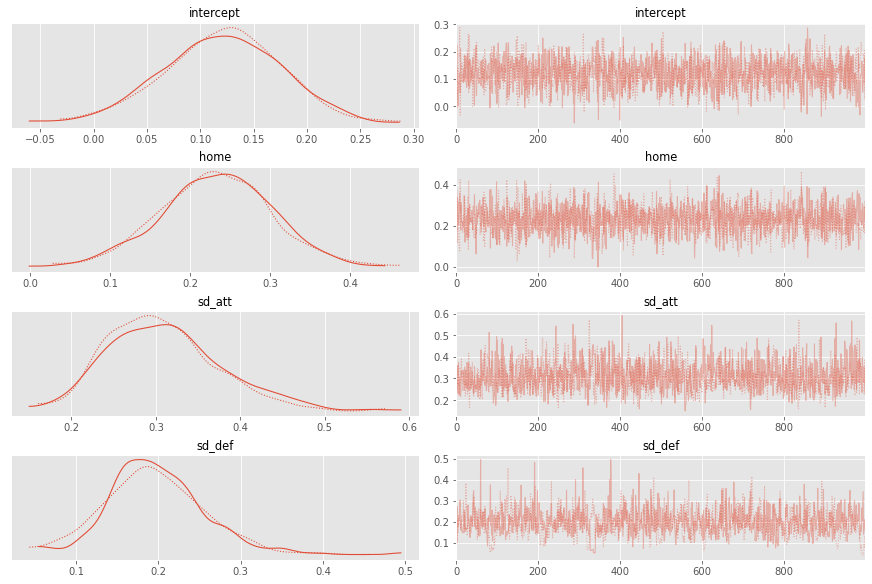

In [249]:
pm.traceplot(trace, var_names=["intercept", "home", "sd_att", "sd_def"]);

/Users/spx8sk/anaconda3/envs/bayesian-hackers/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


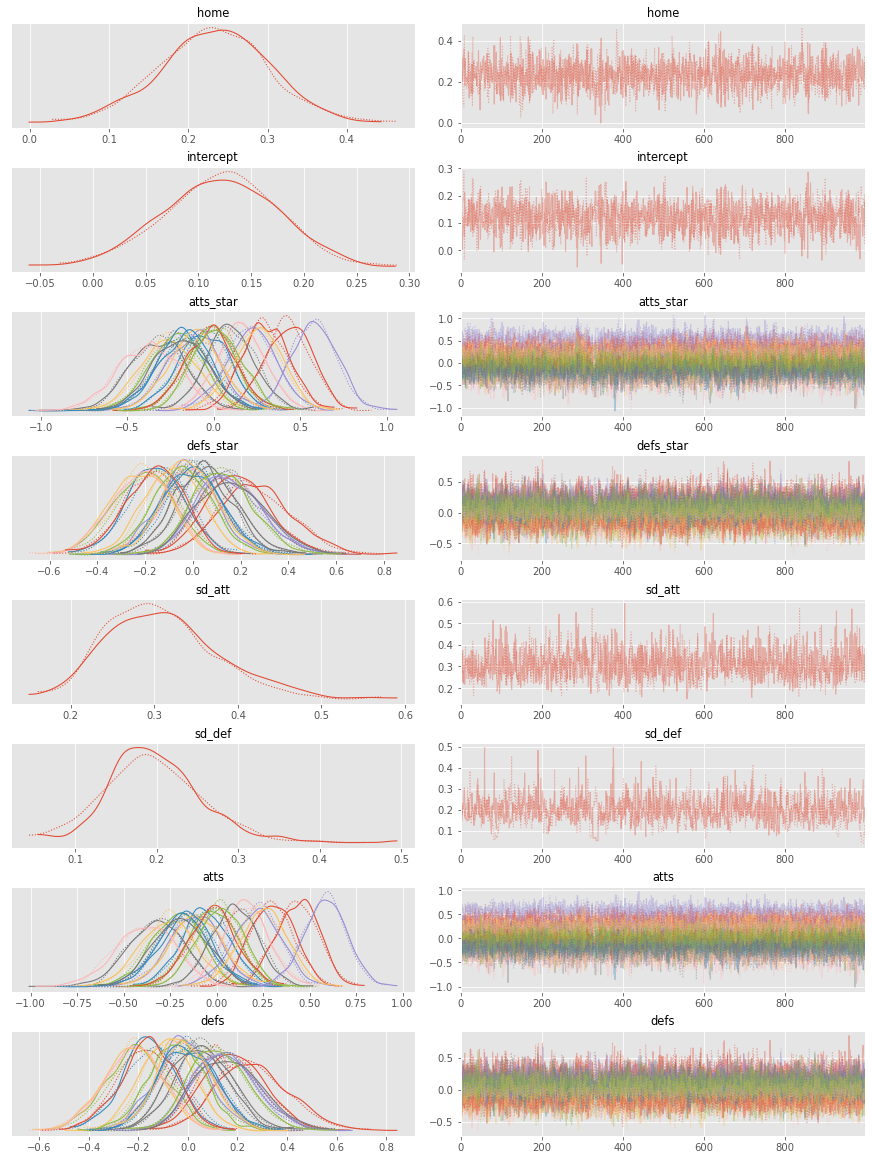

In [335]:
pm.traceplot(trace);

In [ ]:
# Let us apply good statistical workflow practices and look at the various evaluation metrics to see if our NUTS sampler converged.

In [261]:
bfmi = max(pm.stats.bfmi(trace))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace).values()).values

In [255]:
bfmi

0.946921454651903

In [263]:
max_gr

array(1.00629261)

/Users/spx8sk/anaconda3/envs/bayesian-hackers/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


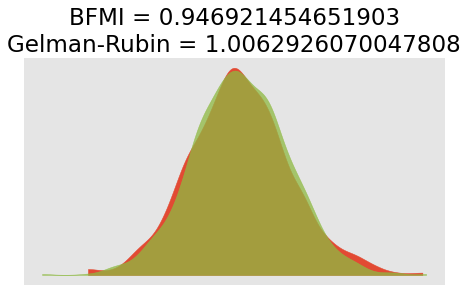

In [262]:
(
    pm.energyplot(trace, legend=False, figsize=(6, 4)).set_title(
        f"BFMI = {bfmi}\nGelman-Rubin = {max_gr}"
    )
);

In [488]:
import arviz as az

In [501]:
hpd_atts = pm.stats.hpd(trace["atts"])
hpd_defs = pm.stats.hpd(trace["defs"])

# hpd_atts = az.stats.hdi(trace["atts"])
# hpd_defs = az.stats.hdi(trace["defs"])

/Users/spx8sk/anaconda3/envs/bayesian-hackers/lib/python3.7/site-packages/arviz/stats/stats.py:341: UserWarning: hpd will be deprecated Please replace hdi
  ("hpd will be deprecated " "Please replace hdi"),


In [502]:
hpd_atts[0]

array([0.21327701, 0.63829695])

In [503]:
np.diff(hpd_atts, axis=1).reshape(-1)

array([0.42501995, 0.48999446, 0.53727568, 0.5417768 , 0.55771868,
       0.51672707, 0.46882825, 0.42961182, 0.54502478, 0.47305408,
       0.46605806, 0.53072734, 0.4734591 , 0.5875092 , 0.48562545,
       0.52690481, 0.43188254, 0.51669218, 0.48146846, 0.46038436])

In [504]:
hpd_atts[:,0]

array([ 0.21327701, -0.31061806, -0.38922033, -0.58931735, -0.54584778,
       -0.47442393, -0.07225904,  0.08803689, -0.44856853, -0.02667665,
       -0.1296125 , -0.37676073, -0.25727388, -0.68333059, -0.25246199,
       -0.43620241,  0.36760381, -0.43323791,  0.01326193, -0.21381875])

In [505]:
hpd_atts[:,0]

array([ 0.21327701, -0.31061806, -0.38922033, -0.58931735, -0.54584778,
       -0.47442393, -0.07225904,  0.08803689, -0.44856853, -0.02667665,
       -0.1296125 , -0.37676073, -0.25727388, -0.68333059, -0.25246199,
       -0.43620241,  0.36760381, -0.43323791,  0.01326193, -0.21381875])

In [506]:
team_number_dict["Norwich City"]

13

In [507]:
np.quantile(trace["atts"][13], 0.5)

0.020104715698761016

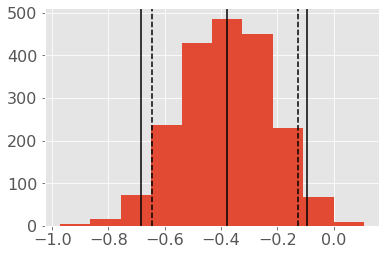

In [508]:
plt.figure()
plt.hist(trace["atts"][:,13], bins=10)
# plt.hist(trace["defs"][:, 13])
plt.axvline(np.quantile(trace["atts"], 0.5, axis=0)[13], c='k')

plt.axvline(hpd_atts[13,0], c='k')
plt.axvline(hpd_atts[13,1], c='k')

plt.axvline(np.quantile(trace["atts"], 0.05, axis=0)[13], c='k', ls='--')
plt.axvline(np.quantile(trace["atts"], 0.95, axis=0)[13], c='k', ls='--')

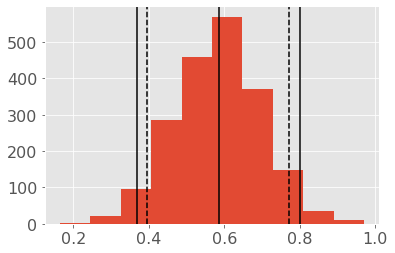

In [509]:
plt.figure()
plt.hist(trace["atts"][:,16], bins=10)
plt.axvline(np.quantile(trace["atts"], 0.5, axis=0)[16], c='k')

plt.axvline(hpd_atts[16,0], c='k')
plt.axvline(hpd_atts[16,1], c='k')

plt.axvline(np.quantile(trace["atts"], 0.05, axis=0)[16], c='k', ls='--')
plt.axvline(np.quantile(trace["atts"], 0.95, axis=0)[16], c='k', ls='--')

In [510]:
hpd_defs[16]

array([-0.08867238,  0.39684875])

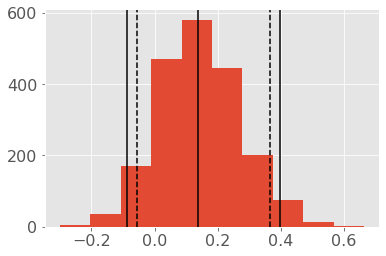

In [518]:
plt.figure()
plt.hist(trace["defs"][:,16], bins=10)
plt.axvline(np.quantile(trace["defs"], 0.5, axis=0)[16], c='k')

plt.axvline(hpd_defs[16,0], c='k')
plt.axvline(hpd_defs[16,1], c='k')

plt.axvline(np.quantile(trace["defs"], 0.05, axis=0)[16], c='k', ls='--')
plt.axvline(np.quantile(trace["defs"], 0.95, axis=0)[16], c='k', ls='--')



In [519]:
hpd_atts.shape

(20, 2)

In [520]:
xx[13]

-0.37912926073202324

In [521]:
xx_err[0][13]

0.3042013291748089

In [522]:
xx_err[1][13]

0.28330787177040473

In [523]:
hpd_atts[13]

array([-0.68333059, -0.09582139])

In [524]:
[xx_err[0][13],xx_err[1][13]]

[0.3042013291748089, 0.28330787177040473]

In [525]:
team_number_dict["Manchester City"]

16

Text(0, 0.5, 'defence')

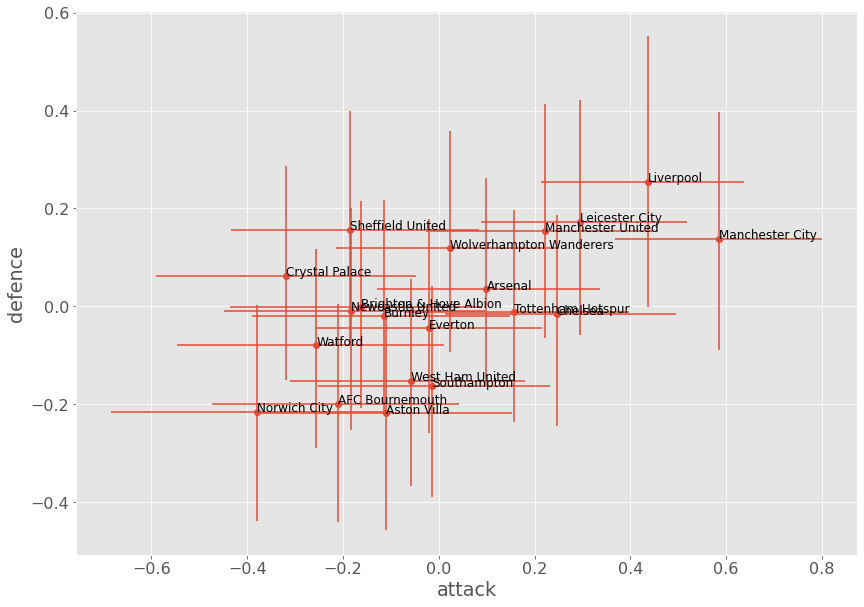

In [542]:
xx = np.quantile(trace["atts"], 0.5, axis=0)
yy = np.quantile(trace["defs"], 0.5, axis=0)

# xx_err = np.diff(hpd_atts, axis=1).reshape(-1)
# yy_err = np.diff(hpd_defs, axis=1).reshape(-1)

xx_err = [xx-hpd_atts[:,0], hpd_atts[:,1]-xx]
yy_err = [yy-hpd_defs[:,0], hpd_defs[:,1]-yy]


plt.figure(figsize=(14,10))
plt.errorbar(xx, yy, xerr=xx_err, yerr=yy_err, fmt="o")

for i, team in enumerate(teams):
    plt.annotate(team, (xx[i], yy[i]), fontsize=12)

plt.xlabel("attack")
plt.ylabel("defence")